In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import files
uploaded = files.upload()

Saving terrorism.csv to terrorism.csv


In [7]:
import io
df = pd.read_csv(io.StringIO(uploaded['terrorism.csv'].decode('ISO-8859-1')))
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [13]:
#showing the top five data from dataset
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
       

In [23]:
df.shape

(181691, 19)

In [10]:
df.isna().sum()

iyear                   0
imonth                  0
iday                    0
country_txt             0
region_txt              0
provstate             421
city                  434
latitude             4556
longitude            4557
location           126196
summary             66129
attacktype1_txt         0
targtype1_txt           0
gname                   0
motive             131130
weaptype1_txt           0
nkill               10313
nwound              16311
addnotes           153402
dtype: int64

In [11]:
df.describe()

,iyear,imonth,iday,latitude,longitude,nkill,nwound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [12]:
print(df["country_txt"].value_counts().idxmax())
print(df["iyear"].value_counts().idxmax())

Iraq
2014


## **Observation**
From above observation i observe following list::


1.   **The data consist of terrorist activites ranging from 1970 to 2017**

2.   **Maximum number of terrorism happen in Iraq country**
3.   **Year 2014 was the most terrorism happened.**



## **Visualizing the data**
**Year Wise Attacks**

In [13]:
attacks = df['iyear'].value_counts(dropna = False).sort_index().to_frame().reset_index().rename(columns={'index':'iyear',"iyear":'Attacks'}).set_index('iyear')
attacks.head()

,Attacks
iyear,
1970,651
1971,471
1972,568
1973,473
1974,581


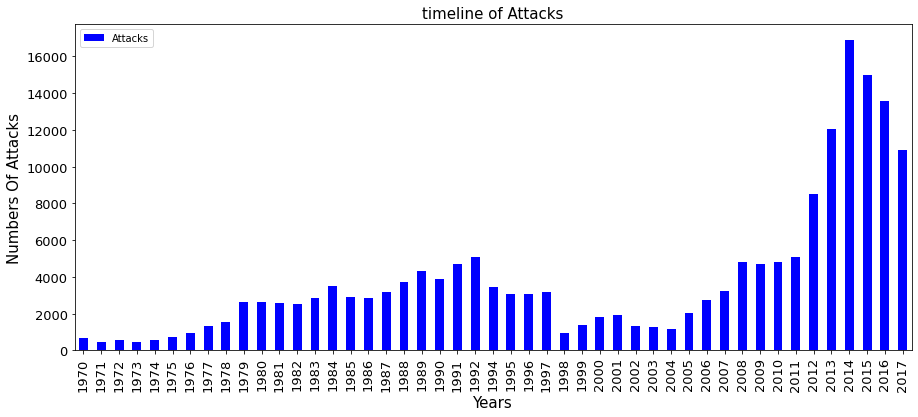

In [14]:
attacks.plot(kind='bar',color='blue',figsize=(15,6), fontsize=13)
plt.title('timeline of Attacks',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Numbers Of Attacks',fontsize=15)
plt.show()

## **Total  Wounded in each Year**

In [18]:
wounded=df[["iyear","nwound"]].groupby("iyear").sum()
wounded.head()

,nwound
iyear,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


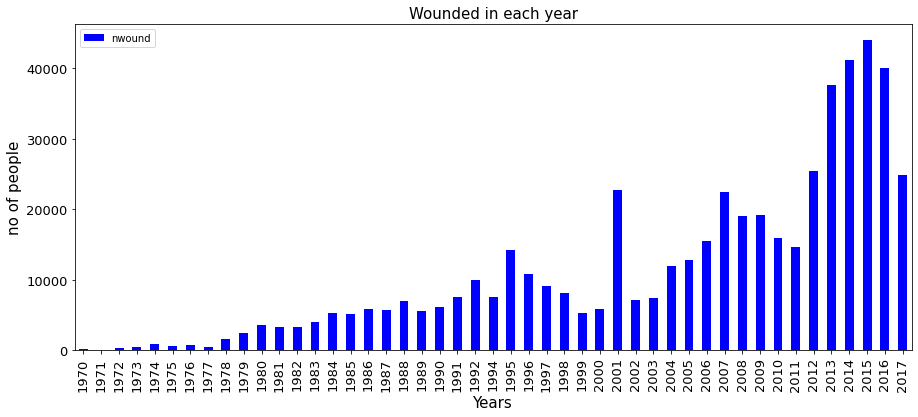

In [19]:
#Wounded

wounded.plot(kind='bar',color='blue',figsize=(15,6), fontsize=13)
plt.title('Wounded in each year',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('no of people',fontsize=15)
plt.show()

## **Total Killed in each Year**

In [25]:
killed=df[["iyear","nkill"]].groupby("iyear").sum()
killed.head()

,nkill
iyear,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


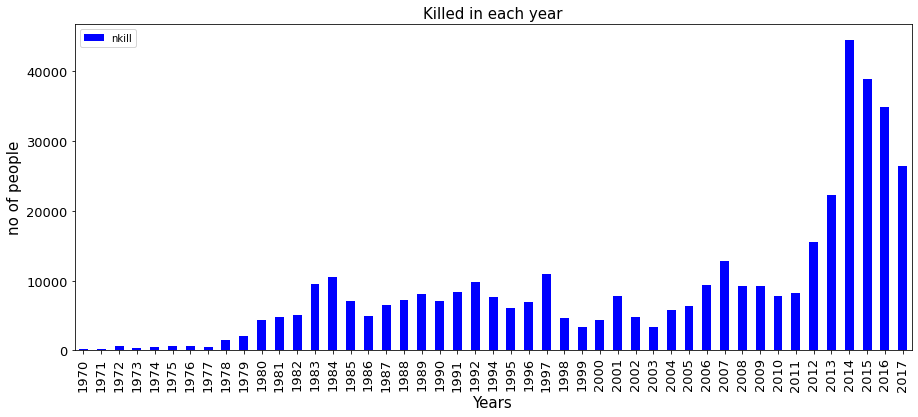

In [21]:
#killed

killed.plot(kind='bar',color='blue',figsize=(15,6), fontsize=13)
plt.title('Killed in each year',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('no of people',fontsize=15)
plt.show()

In [27]:
print(f"Maximum number of people killed: {killed.max()}")
print(f"Maximum number of people wounded: {wounded.max()}")

Maximum number of people killed: nkill    44490.0
dtype: float64
Maximum number of people wounded: nwound    44043.0
dtype: float64


## **Observation from above analysis and visualization**


1.   maximum number people killed in year 2014 - 44490.
2.   maximum number of people wounded in year 2015 - 44043.



## **Region wise Attacks**

1.Region-wise terrorist attacks  by each year


In [29]:
region=pd.crosstab(df.iyear,df.region_txt)
region.head()

region_txt,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
iyear,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


2. Total Terrorist Attacks in each Region from 1970-2017

In [31]:
total_region_attacks = region.transpose()
total_region_attacks["Total"]=total_region_attacks.sum(axis=1)
total_attacks=total_region_attacks["Total"].sort_values(ascending=False)
total_attacks

region_txt
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

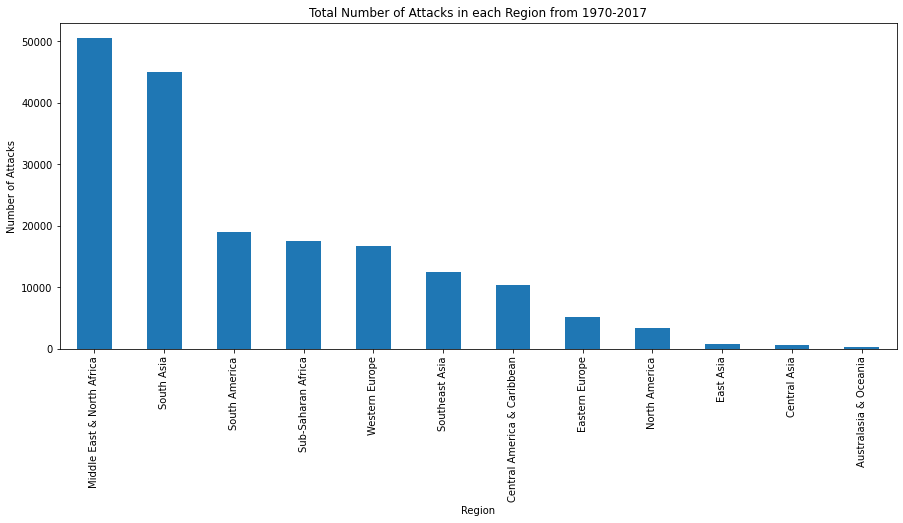

In [32]:
total_attacks.plot(kind="bar",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

 **Observation from above visualization**
1. maximum number of attacks occured at Middle East & North Africa - 50474

2. minimum number of attacks occured at Australasia & Oceania - 282



# **Killed in each region**

In [33]:
#killed
killed_region = df[["region_txt","nkill"]].groupby("region_txt").sum().sort_values(by="nkill",ascending=False)
killed_region

,nkill
region_txt,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


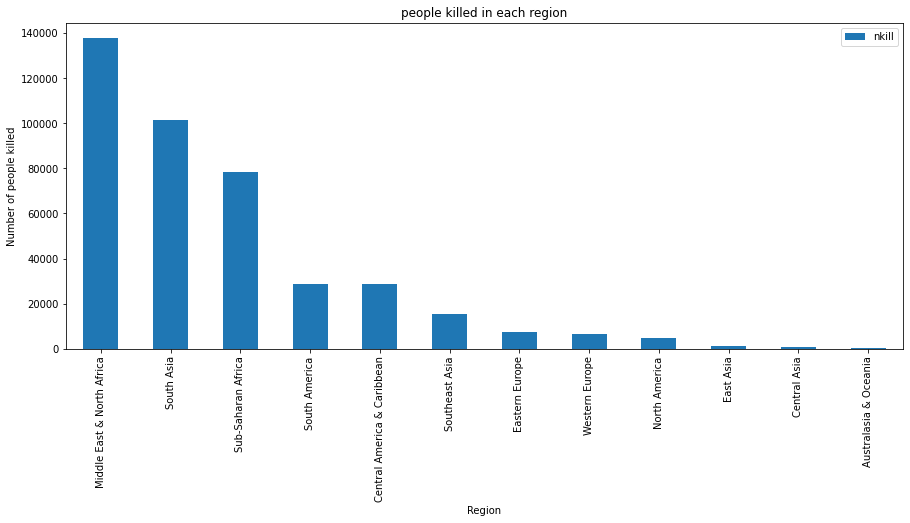

In [34]:
killed_region.plot(kind="bar",figsize=(15,6))
plt.title("people killed in each region")
plt.xlabel("Region")
plt.ylabel("Number of people killed")
plt.show()

In [35]:
#wounded
wounded_region = df[["region_txt","nwound"]].groupby("region_txt").sum().sort_values(by="nwound",ascending=False)
wounded_region


,nwound
region_txt,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


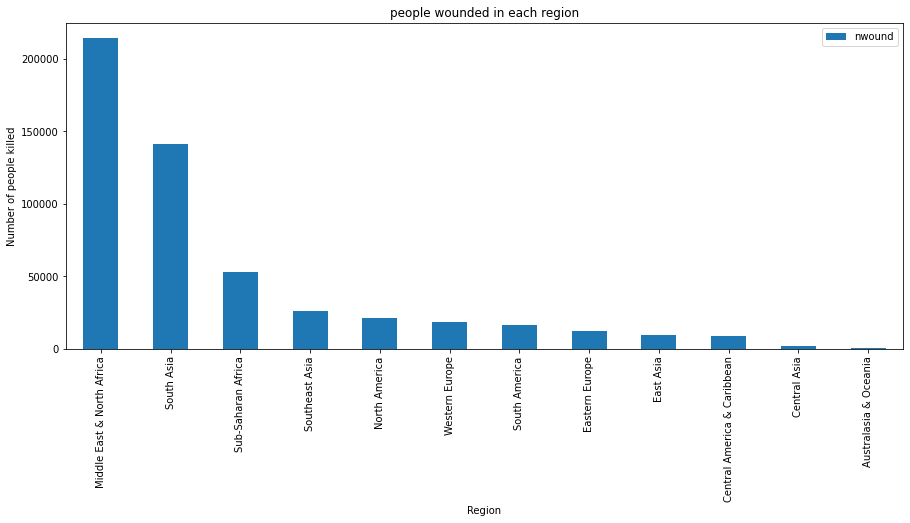

In [36]:
wounded_region.plot(kind="bar",figsize=(15,6))
plt.title("people wounded in each region")
plt.xlabel("Region")
plt.ylabel("Number of people killed")
plt.show()

## **Observation**
killed people
1. maximum number of peoplke killed in Middle East & North Africa	- 137642
2. minimum number of people killed in Australasia & Oceania -	150

wounded people
1. maximum number of peoplke wounded in Middle East & North Africa	- 214308
2. minimum number of people wounded in Australasia & Oceania -	260


## **Country-wise Attacks analysis**


In [40]:
country_attack=df["country_txt"].value_counts().head(15)
country_attack


Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: country_txt, dtype: int64

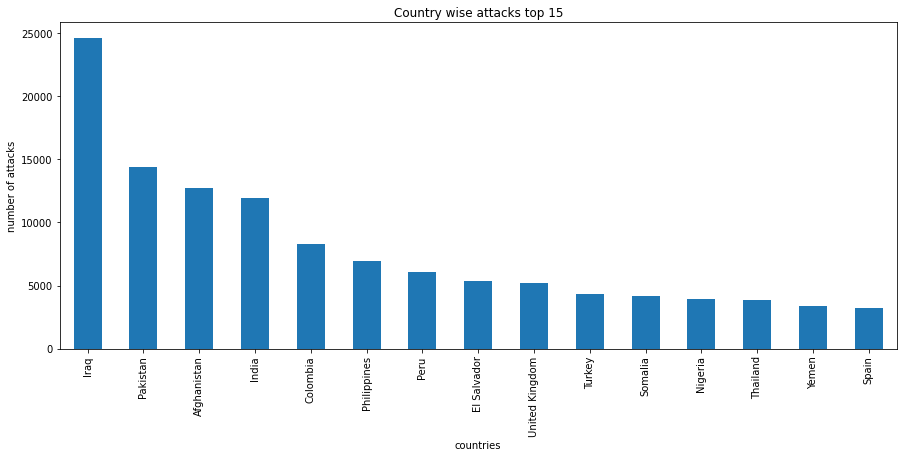

In [42]:
country_attack.plot(kind="bar",figsize=(15,6))
plt.title("Country wise attacks top 15")
plt.xlabel("countries")
plt.ylabel("number of attacks")
plt.show()

total number of killed in each country

In [46]:
killed_country=df[["country_txt","nkill"]].groupby("country_txt").sum().sort_values(by="nkill",ascending=False).head(15)
killed_country

,nkill
country_txt,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


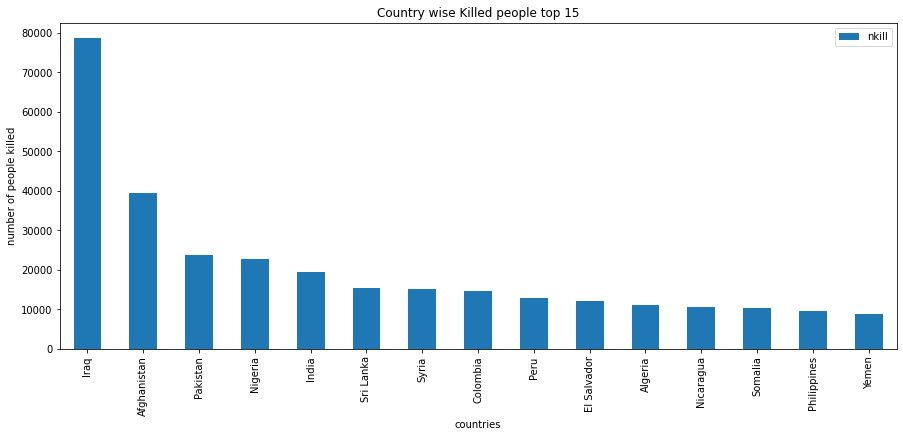

In [47]:
killed_country.plot(kind="bar",figsize=(15,6))
plt.title("Country wise Killed people top 15")
plt.xlabel("countries")
plt.ylabel("number of people killed")
plt.show()

maximum number of people killed in Iraq country